# 상관분석이란?
두 연속 변수가 서로 관련이 있는지 검정하는 통계 분석 기법이다.

상관계수는 0~1 사이의 값을 지니며 1에 가까울수록 관련성이 크다는 것을 의미한다.

In [2]:
# 실업자 수와 개인 소비 지출의 상관 관계

# 1. 상관계수 구하기
# df.corr() 을 이용해 구할 수 있다.
import pandas as pd

# economics 데이터 불러오기
economics = pd.read_csv("../data/economics.csv")

# 상관행렬 만들기
economics[["unemploy", "pce"]].corr()

# 상관계수가 양수 0.61이므로, 실업자 수와 개인 소비 지출은 한 변수가 증가하면 다른 변수가 증가하는 정비례 관계

,unemploy,pce
unemploy,1.000000,0.614518
pce,0.614518,1.000000


In [4]:
# 2. 유의확률 구하기
# scipy 패키지의 stats.perasonr()

from scipy import stats

stats.pearsonr(economics["unemploy"], economics["pce"])

# 첫 번째 값 : 상관계수
# 두 번째 값 : 유의확률

PearsonRResult(statistic=0.6145176141932083, pvalue=6.773527303289381e-61)

In [9]:
mtcars = pd.read_csv("../data/mtcars.csv")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
car_cor = mtcars.corr()  # 상관행렬 만들기
car_cor = round(car_cor, 2)  # 소수점 둘째 자리까지 반올림
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


<Axes: >

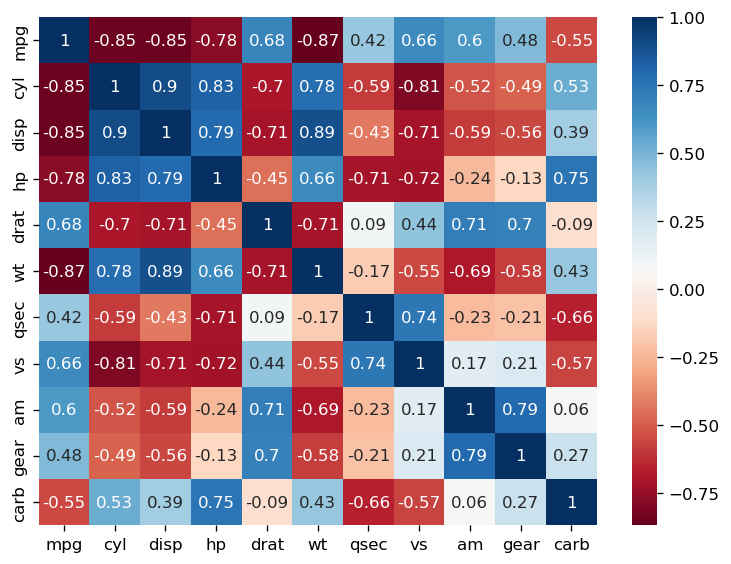

In [10]:
# 히트맵 만들기
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({"figure.dpi": "120", "figure.figsize": [7.5, 5.5]})

sns.heatmap(car_cor, annot=True, cmap="RdBu")

In [11]:
# 대각 행렬 제거하기

# 1. mask 만들기
# np.zero_like()

import numpy as np

mask = np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
# 배열의 오른쪽 위 인덱스를 구하는 np.triu_indices_from() 을 활용해 mask 오른쪽 위 대각 행렬을 1로 바꾼다.

mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<Axes: >

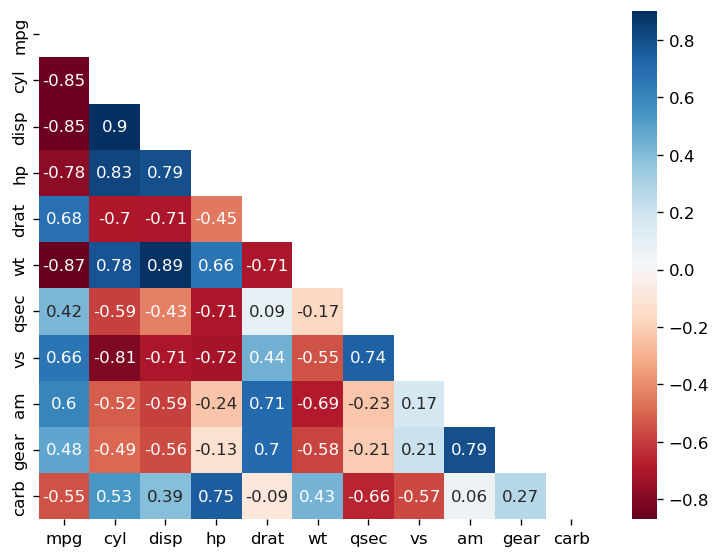

In [17]:
# 히트맵 mask 적용하기

sns.heatmap(data=car_cor, annot=True, cmap="RdBu", mask=mask)

<Axes: >

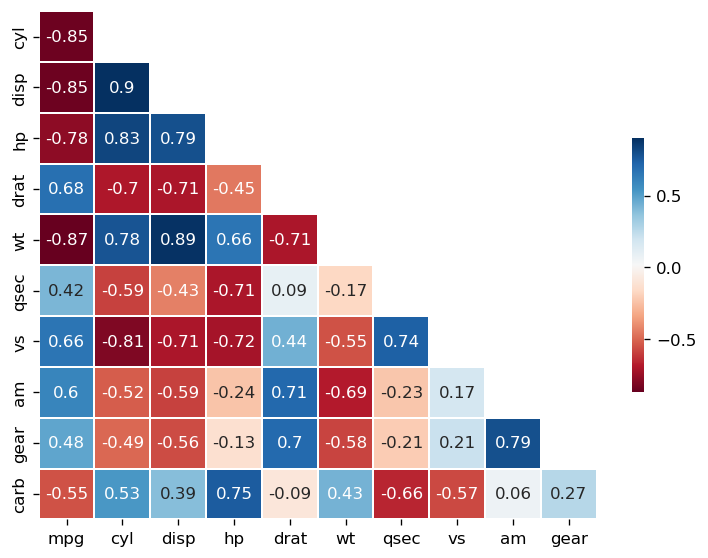

In [24]:
# 빈 행과 열 제거하기
mask_new = mask[1:, :-1]  # mask 첫 번째 행, 마지막 열 제거
cor_new = car_cor.iloc[1:, :-1]  # 생활행렬 첫 번째 행, 마지막 열 제거

# 히트맵 만들기
sns.heatmap(
    data=cor_new,
    annot=True,
    cmap="RdBu",
    mask=mask_new,
    linewidths=1,
    cbar_kws={"shrink": 0.5},
)